### MP/BME 573: Homework Set 6 / solutions

In [2]:
## MP 573 HW6
##
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio
import scipy.optimize as opt
import numpy.random as rnd

font = {'weight' : 'normal',
        'size'   : 20}

## Problem 1E:

Plot or draw the following sets for a two-dimensional vector $\mathbf{x} \in \mathbb{R}^2$}

i. $\| \mathbf{x} \|_\infty < 1$ (where $\| \mathbf{x} \|_\infty = \max_n | x_n |$ 

ii. $\| \mathbf{x} \|_2 < 1$ 

iii. $\| \mathbf{x} \|_1 < 1$ 

iv. $\| \mathbf{x} \|_{\frac{1}{2}} < 1$ (not a norm, but we can define and plot the set 
using the expression $\| \mathbf{x} \|_{\frac{1}{2}} = \left( \sum_n  | x_n |^{1/2} \right) ^2) $)
 

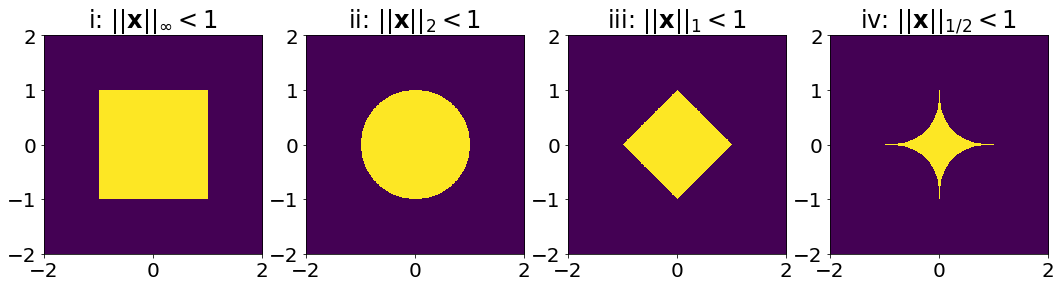

In [44]:
# Let's create these sets numerically
N = 501
xmax = 2
xval = np.linspace(-xmax,xmax,N)
X1,X2 = np.meshgrid(xval,-xval)

# Show the four sets
plt.figure(figsize=(18, 8)) 
plt.rc('font', **font)
# First set (ell_infinity)
plt.subplot(1,4,1)
norm_infty = np.maximum(np.abs(X1),np.abs(X2))
plt.imshow(norm_infty<1,extent=[-xmax,xmax,-xmax,xmax])
plt.title('i: $\|\| \mathbf{x} \|\|_{\infty} < 1$')

# Second set (ell_2)
plt.subplot(1,4,2)
norm_l2 = np.sqrt(X1**2 + X2**2)
plt.imshow(norm_l2<1,extent=[-xmax,xmax,-xmax,xmax])
plt.title('ii: $\|\| \mathbf{x} \|\|_{2} < 1$')

# Third set (ell_1)
plt.subplot(1,4,3)
norm_l1 = np.abs(X1) + np.abs(X2)
plt.imshow(norm_l1<1,extent=[-xmax,xmax,-xmax,xmax])
plt.title('iii: $\|\| \mathbf{x} \|\|_{1} < 1$')

# Fourth set (ell_half)
plt.subplot(1,4,4)
norm_lhalf = (np.sqrt(np.abs(X1)) + np.sqrt(np.abs(X2)))**2
plt.imshow(norm_lhalf<1,extent=[-xmax,xmax,-xmax,xmax])
plt.title('iv: $\|\| \mathbf{x} \|\|_{1/2} < 1$');


## Problem 5C: A specific example of ML and MAP estimation. 


Assuming that $\sigma_1 = 1$, $\sigma_2 = 1$, and:
\begin{equation}
    \mathbf{A} =
  \left[ {\begin{array}{ccc}
   1 & 1 & 0 \\
   1 & 0 & 1 \\
   0 & 1 & 1 \\
    \end{array} } \right]
\end{equation}
\begin{equation}
    \mathbf{b} =
  \left[ {\begin{array}{c}
   3 \\
   4 \\
   5 \\
    \end{array} } \right]
\end{equation}
find the ML and MAP estimates $\hat{\mathbf{x}}_{ML}$ and $\hat{\mathbf{x}}_{MAP}$. 

Next, assume that the a priori distribution of $\mathbf{x}$ is  `tighter', eg: $\sigma_2 = 0.5$. What is the new value of  $\hat{\mathbf{x}}_{MAP}$? How about if $\sigma_2 = 0.2$? Can you guess what is the limit of $\hat{\mathbf{x}}_{MAP}$ as $\sigma_2 \to 0$? 


Next, assume that the a priori distribution of $\mathbf{x}$ is`broader', eg: $\sigma_2 = 2$. What is the new value of  $\hat{\mathbf{x}}_{MAP}$? How about if $\sigma_2 = 5$? Can you guess what is the limit of $\hat{\mathbf{x}}_{MAP}$ as $\sigma_2 \to \infty$? 


In [87]:
A = np.array([[1, 1, 0], 
    [1, 0, 1],
    [0, 1, 1]])

b = np.array([[3], 
    [4],
    [5]])

# ML solution
xML = la.lstsq(A,b,rcond=None)[0]
print('Maximum likelihood solution')
print(xML)

# MAP solution (pick sigma1 and sigma2 as described in the problem)
sigma1 = 1; sigma2=1;
G = np.identity(3)
A2 = np.concatenate((A,sigma1/sigma2*G),axis=0)
b2 = np.concatenate((b,0*b),axis=0)
xMAP = la.lstsq(A2,b2,rcond=None)[0]
print('MAP solution')
print(xMAP)




Maximum likelihood solution
[[1.]
 [2.]
 [3.]]
MAP solution
[[1.1]
 [1.6]
 [2.1]]
